# DataSet

In [750]:
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Imports

In [751]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Data Collection

In [752]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [753]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [754]:
def clean_dataframe(df):
  """
  Retrieves dataframe and converts all columns to lower case and replaces
  any spaces with underscores. It also does the same with an object columns
  """
  df.columns = df.columns.str.lower().str.replace(' ', '_')
  categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

  for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
  
  return df

In [755]:
df = clean_dataframe(df)
df.sample(1).T

,3738
customerid,4950-bdeux
gender,male
seniorcitizen,0
partner,no
dependents,no
tenure,35
phoneservice,no
multiplelines,no_phone_service
internetservice,dsl
onlinesecurity,no


# Inital Preprocessing
* Check Data Types - Are they the correct data types 
* Get Info 
* Describe Data 


## Data Types

In [756]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Change total charges to correct  datatype and remove missing values

In [757]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [758]:
df['totalcharges'].isnull().sum()

11

In [759]:
df['totalcharges'] = df['totalcharges'].fillna(0)

In [760]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## Dataframe information

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [762]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [763]:
df.describe(include=['O'])

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-vhveg,male,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# Create Test and Validation Sets


In [764]:
from sklearn.model_selection import train_test_split

In [765]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [766]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=12)

In [767]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [768]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA
* Check missing values 
* Look at Numerical and Categorical Variables

In [769]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


Check Missing Values 

In [770]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [771]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [772]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [773]:
global_churn_rate = df_full_train.churn.mean()

# Feature Selection



## Variance Thresholding

In [774]:
# screen through our features and list those with high numbers of unique values
for col in df_full_train.columns:
    fraction_unique = df_full_train[col].unique().shape[0] / df_full_train.shape[0]
    if fraction_unique > 0.5:
        print(col)

customerid
totalcharges


In [775]:
df_full_train.drop('customerid', axis=1, inplace=True)

# Sort numerical & categorical variables

In [776]:
df_full_train.columns[:-1]

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [777]:
def separate_cat_and_num_columns(df, skip):
  """
  Splits categorical & numerical columns for further analysis. 
  The negative 1 is to remove the target column if there is one.
  the skip parameters, skips any numerical data types that should be 
  in categorical 
  """
  numerical = []
  categorical = []

  for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
      numerical.append(col)
    else:
      categorical.append(col)
  
  if len(skip) > 0:
    categorical.append(skip)
    numerical.remove(skip)
  return numerical, categorical 

In [778]:
numerical, categorical = separate_cat_and_num_columns(df_full_train, skip='seniorcitizen')

In [779]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [780]:
df_full_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

# Feature Importance


## Risk Ratio

Difference: 

If the Group mean is > than the Gloabl mean it means they are more likely to churn. 

If the global mean is higher it means they are less likely to churn

Risk Ratio:

Risk = Group / Global = > 1: More likely to churn, < 1: Less likely to churn

In [781]:
from IPython.display import display
def risk_ratio_to_target(df, categorical, target):
  """
  Performs the risk ratio to the target
  """
  global_rate = df[f'{target}'].mean()

  for c in categorical:
    df_group = df.groupby(c)[f"{target}"].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_rate
    df_group['risk'] = df_group['mean'] / global_rate
    display(df_group)
    print()

In [782]:
risk_ratio_to_target(df_full_train, categorical, target="churn")

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


## Phi k

In [783]:
!pip install phik
import phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [784]:
# get the phi_k correlation matrix between all variables
p_corr = df_full_train.phik_matrix()

interval columns not set, guessing: ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']


In [785]:
p_corr['churn'].sort_values(ascending=False)

churn               1.000000
tenure              0.470033
paymentmethod       0.442571
monthlycharges      0.358122
paperlessbilling    0.283754
totalcharges        0.273662
contract            0.251180
dependents          0.235317
seniorcitizen       0.219379
partner             0.217213
onlinesecurity      0.209221
techsupport         0.205618
internetservice     0.197012
onlinebackup        0.177951
deviceprotection    0.169982
streamingtv         0.139565
streamingmovies     0.138760
phoneservice        0.024450
multiplelines       0.022218
gender              0.010582
Name: churn, dtype: float64

## Mutual Information

In [786]:
from sklearn.metrics import mutual_info_score

In [787]:
def mutual_information_categorical(series):
  return mutual_info_score(series, df_full_train.churn)

In [788]:
mi = df_full_train[categorical].apply(mutual_information_categorical)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Numerical Correlation

In [789]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

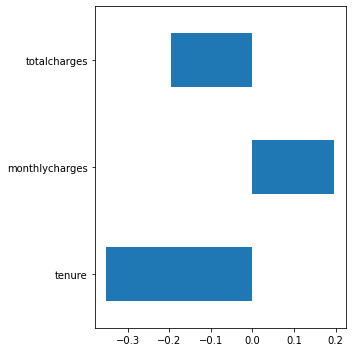

In [790]:
# import matplotlib.pyplot as plt

f = plt.figure(figsize=(5, 5))
df_full_train[numerical].corrwith(df_full_train.churn).plot.barh()
plt.tight_layout()

In [791]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [792]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()

0.3994413407821229

In [793]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

# One-hot encoding

In [794]:
from sklearn.feature_extraction import DictVectorizer

In [795]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [796]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

#Logisitic Regression

In [797]:
from sklearn.linear_model import LogisticRegression 

In [798]:
model = LogisticRegression(solver='liblinear')

In [799]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [800]:
model.intercept_[0]

-0.14361981675662785

In [801]:
model.coef_[0].round(3)

array([ 0.581, -0.013, -0.711, -0.064, -0.079,  0.04 , -0.113, -0.071,
       -0.067, -0.077, -0.377,  0.346, -0.113,  0.002, -0.219,  0.076,
       -0.   ,  0.125, -0.113, -0.156,  0.175, -0.113, -0.205, -0.289,
        0.145, -0.119, -0.025, -0.131, -0.093,  0.164, -0.084,  0.076,
       -0.219,  0.274, -0.146, -0.113,  0.116, -0.085, -0.113,  0.054,
        0.218, -0.113, -0.249, -0.058,  0.   ])

In [802]:
y_pred = model.predict_proba(X_val)[:,1]

In [803]:
churn_decision = y_pred >= 0.5

In [804]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,1285-okipp,male,0,no,no,1,yes,no,fiber_optic,no,no,no,no,no,yes,month-to-month,no,electronic_check,79.90,79.90
1,5022-jnqeq,female,0,yes,yes,9,yes,no,fiber_optic,no,no,no,yes,no,no,month-to-month,yes,electronic_check,75.85,647.50
2,1016-djtsv,male,1,no,no,8,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.70,572.85
8,3001-unbtl,male,1,yes,yes,29,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,103.95,2964.80
10,2024-baskd,female,0,no,no,1,yes,no,fiber_optic,no,no,yes,no,no,no,month-to-month,yes,mailed_check,74.60,74.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,5215-lnldj,female,0,yes,yes,7,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,yes,electronic_check,24.70,149.05
1383,0365-bzuwy,male,0,yes,no,17,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,102.55,1742.50
1386,0420-hlgxf,female,1,no,no,39,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,99.75,4036.00
1390,3716-bdvdb,male,0,no,no,1,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.10,69.10


In [805]:
(y_val == churn_decision).mean()

0.7984386089425124

Predicition DataFrame 

In [806]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred 
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.671134,1,1,True
1,0.548530,1,0,False
2,0.704230,1,0,False
3,0.074726,0,0,True
4,0.338344,0,0,True
...,...,...,...,...
1404,0.175111,0,0,True
1405,0.169509,0,0,True
1406,0.020201,0,0,True
1407,0.006947,0,0,True


In [807]:
df_pred.correct.mean()

0.7984386089425124

Without SMOTE: Accuracy is:  80%

# Over-Sampling Analysis



In [808]:
# https://imbalanced-learn.org/stable/over_sampling.html
!pip install imbalanced-learn
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [809]:
def train_classifier(X, y, X_val, y_val):
  model = LogisticRegression(solver='liblinear')
  model.fit(X, y)
  print(f"Intercept: {model.intercept_[0]}")
  print(f"Coefficients: {model.coef_[0][:4].round(3)}")
  print(f"Score: {model.score(X, y)}")
  print()
  y_pred = model.predict_proba(X_val)[:,1]
  decision = y_pred > 0.5
  print(f"Accuracy: {(y_val == decision).mean()}")

## Naive random over-sampling

In [810]:
from imblearn.over_sampling import RandomOverSampler

In [811]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled =ros.fit_resample(X_train, y_train)

In [812]:
Counter(y_resampled)

Counter({0: 3091, 1: 3091})

### Train Classifier 

In [813]:
ros_analysis = train_classifier(X_resampled,y_resampled, X_val, y_val)

Intercept: -0.05863819499388209
Coefficients: [ 0.663  0.027 -0.748 -0.008]
Score: 0.7664186347460369

Accuracy: 0.7395315826827538


## SMOTE Analysis

In [814]:
from imblearn.over_sampling import SMOTE, ADASYN

In [815]:
X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

In [816]:
Counter(y)

Counter({0: 2756, 1: 2756})

In [817]:
# constructed feature names and values are returned rather than the original ones
# ori = dv.inverse_transform(X)

In [818]:
smote_analysis = train_classifier(X_smote,y_smote, X_val, y_val)

Intercept: -0.04510861005135307
Coefficients: [ 0.614 -0.019 -0.64  -0.024]
Score: 0.7756389517955354

Accuracy: 0.7430801987224982


## ADASYN Analysis

In [819]:
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

In [820]:
Counter(y)

Counter({0: 2756, 1: 2756})

In [821]:
adasyn_analysis = train_classifier(X_adasyn,y_adasyn, X_val, y_val)

Intercept: -0.021735621828165994
Coefficients: [ 0.715  0.059 -0.797  0.046]
Score: 0.7550662198819211

Accuracy: 0.71611071682044


With OverSampling: Accuracy is:  73%

# Using the model

In [822]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [823]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [824]:
y_full_train = df_full_train.churn.values

In [825]:
model = LogisticRegression(solver='liblinear')
model.fit(X_full_train, y_full_train)

LogisticRegression(solver='liblinear')

In [826]:
model.score(X_full_train, y_full_train)

0.8042243521476748

In [827]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [828]:
X_test = dv.transform(dict_test)

In [829]:
y_pred = model.predict_proba(X_test)[:, 1]

In [830]:
predicitions = (y_pred >= 0.5)

In [831]:
(predicitions == y_test).mean()

0.8126330731014905